In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from skimage.transform import resize
from skimage.io import imread
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
Categories=['total_normal','total_pneumonia']

In [3]:
def load_image(datadir, Categories):

    flat_data_arr=[]
    target_arr=[]

    for i in Categories:

        print(f'loading... category : {i}')
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(150,150,3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
        print(f'loaded category:{i} successfully')

    flat_data=np.array(flat_data_arr)
    target=np.array(target_arr)

    df=pd.DataFrame(flat_data)
    df['Target']=target

    x=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    return x, y

In [4]:
datadir = 'D:/github/archive/chest_xray/total_dataset'
X, y = load_image(datadir, Categories)

loading... category : total_normal
loaded category:total_normal successfully
loading... category : total_pneumonia
loaded category:total_pneumonia successfully


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train,y_train)

c:\Users\sauvi\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

ValueError: x and y must be the same size

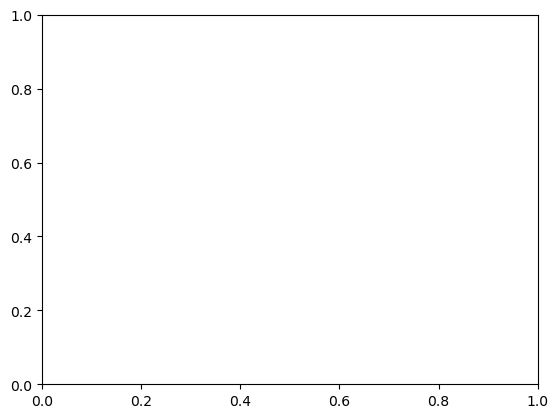

In [7]:
plt.scatter(X_train, y_train)
plt.plot(X_test, lor.predict((X_test)), color='r')

In [8]:
print("Logistic Regression Accuracy Score: ", lor.score(X_test, y_test))

Logistic Regression Accuracy Score:  0.9355022831050228


In [9]:
y_pred = lor.predict(X_test)

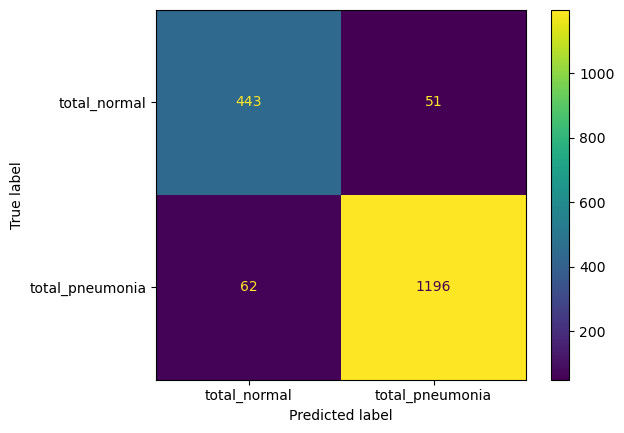

In [10]:
cm1 = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=Categories).plot()

In [11]:
print(classification_report(y_test, y_pred, target_names=Categories))

                 precision    recall  f1-score   support

   total_normal       0.90      0.88      0.89       505
total_pneumonia       0.95      0.96      0.95      1247

       accuracy                           0.94      1752
      macro avg       0.92      0.92      0.92      1752
   weighted avg       0.94      0.94      0.94      1752



In [21]:
from sklearn.metrics import precision_recall_curve, auc

In [22]:
# Predict probabilities for positive class
y_scores = lor.predict_proba(X_test)[:, 1]
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

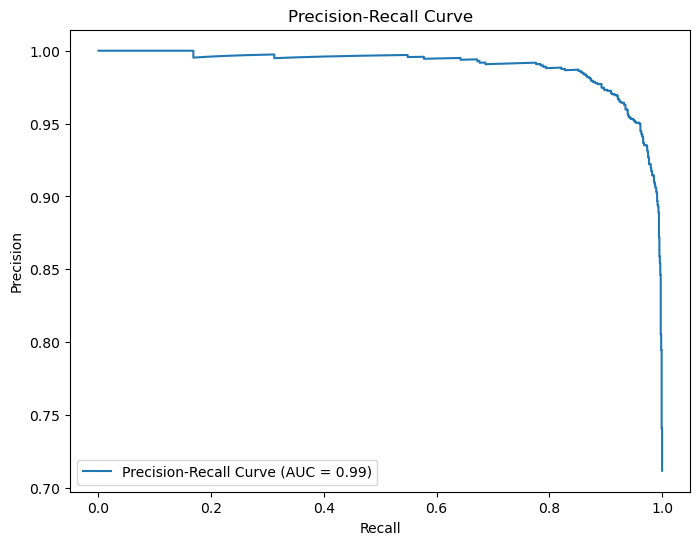

In [23]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

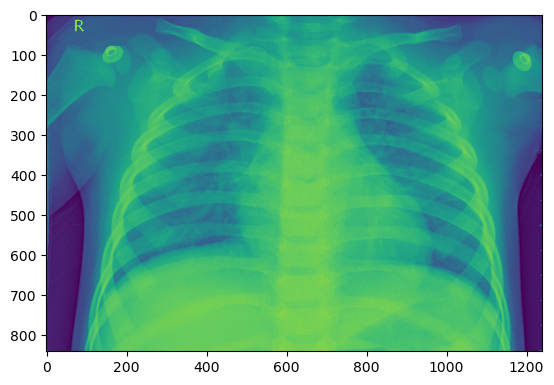

total_normal = 0.005981466768101296%
total_pneumonia = 99.9940185332319%
The predicted image is : total_pneumonia


In [16]:
url=input('Enter URL of Image :')
img=imread(url)
#img = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
img_resize=resize(img,(150,150,3))
plt.imshow(img)
plt.show()
l=[img_resize.flatten()]
probability=lor.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[lor.predict(l)[0]])

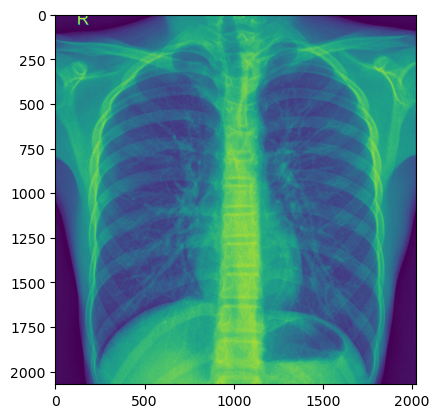

total_normal = 99.99869859593122%
total_pneumonia = 0.0013014040687797897%
The predicted image is : total_normal


In [17]:
url=input('Enter URL of Image :')
img=imread(url)
#img = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
img_resize=resize(img,(150,150,3))
plt.imshow(img)
plt.show()
l=[img_resize.flatten()]
probability=lor.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[lor.predict(l)[0]])